<a href="https://colab.research.google.com/github/tabassum-laz/Artificial-Intelligence-Lab/blob/main/AI_Lab7_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
from google.colab import drive

In [17]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df=pd.read_csv("/content/drive/MyDrive/AI lab/credit card.csv")

In [21]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,NaN,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,NaN,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [22]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           2
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [23]:
df=df.dropna()

In [24]:
df.shape

(29998, 25)

In [25]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [26]:
features= df.columns

In [27]:
x=df.iloc[:,0:24]
y=df.iloc[:,[24]]

In [28]:
x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
5,6,50000.0,1,1,2,37.0,0,0,0,0,...,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
6,7,500000.0,1,1,2,29.0,0,0,0,0,...,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0


In [ ]:
y.head()

,default.payment.next.month
0,1
1,1
4,0
5,0
6,0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=.30,random_state=1)

Train data accuracy: 1.0
Test data accuracy: 0.7188888888888889
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7034
           1       0.37      0.40      0.38      1966

    accuracy                           0.72      9000
   macro avg       0.60      0.60      0.60      9000
weighted avg       0.73      0.72      0.72      9000



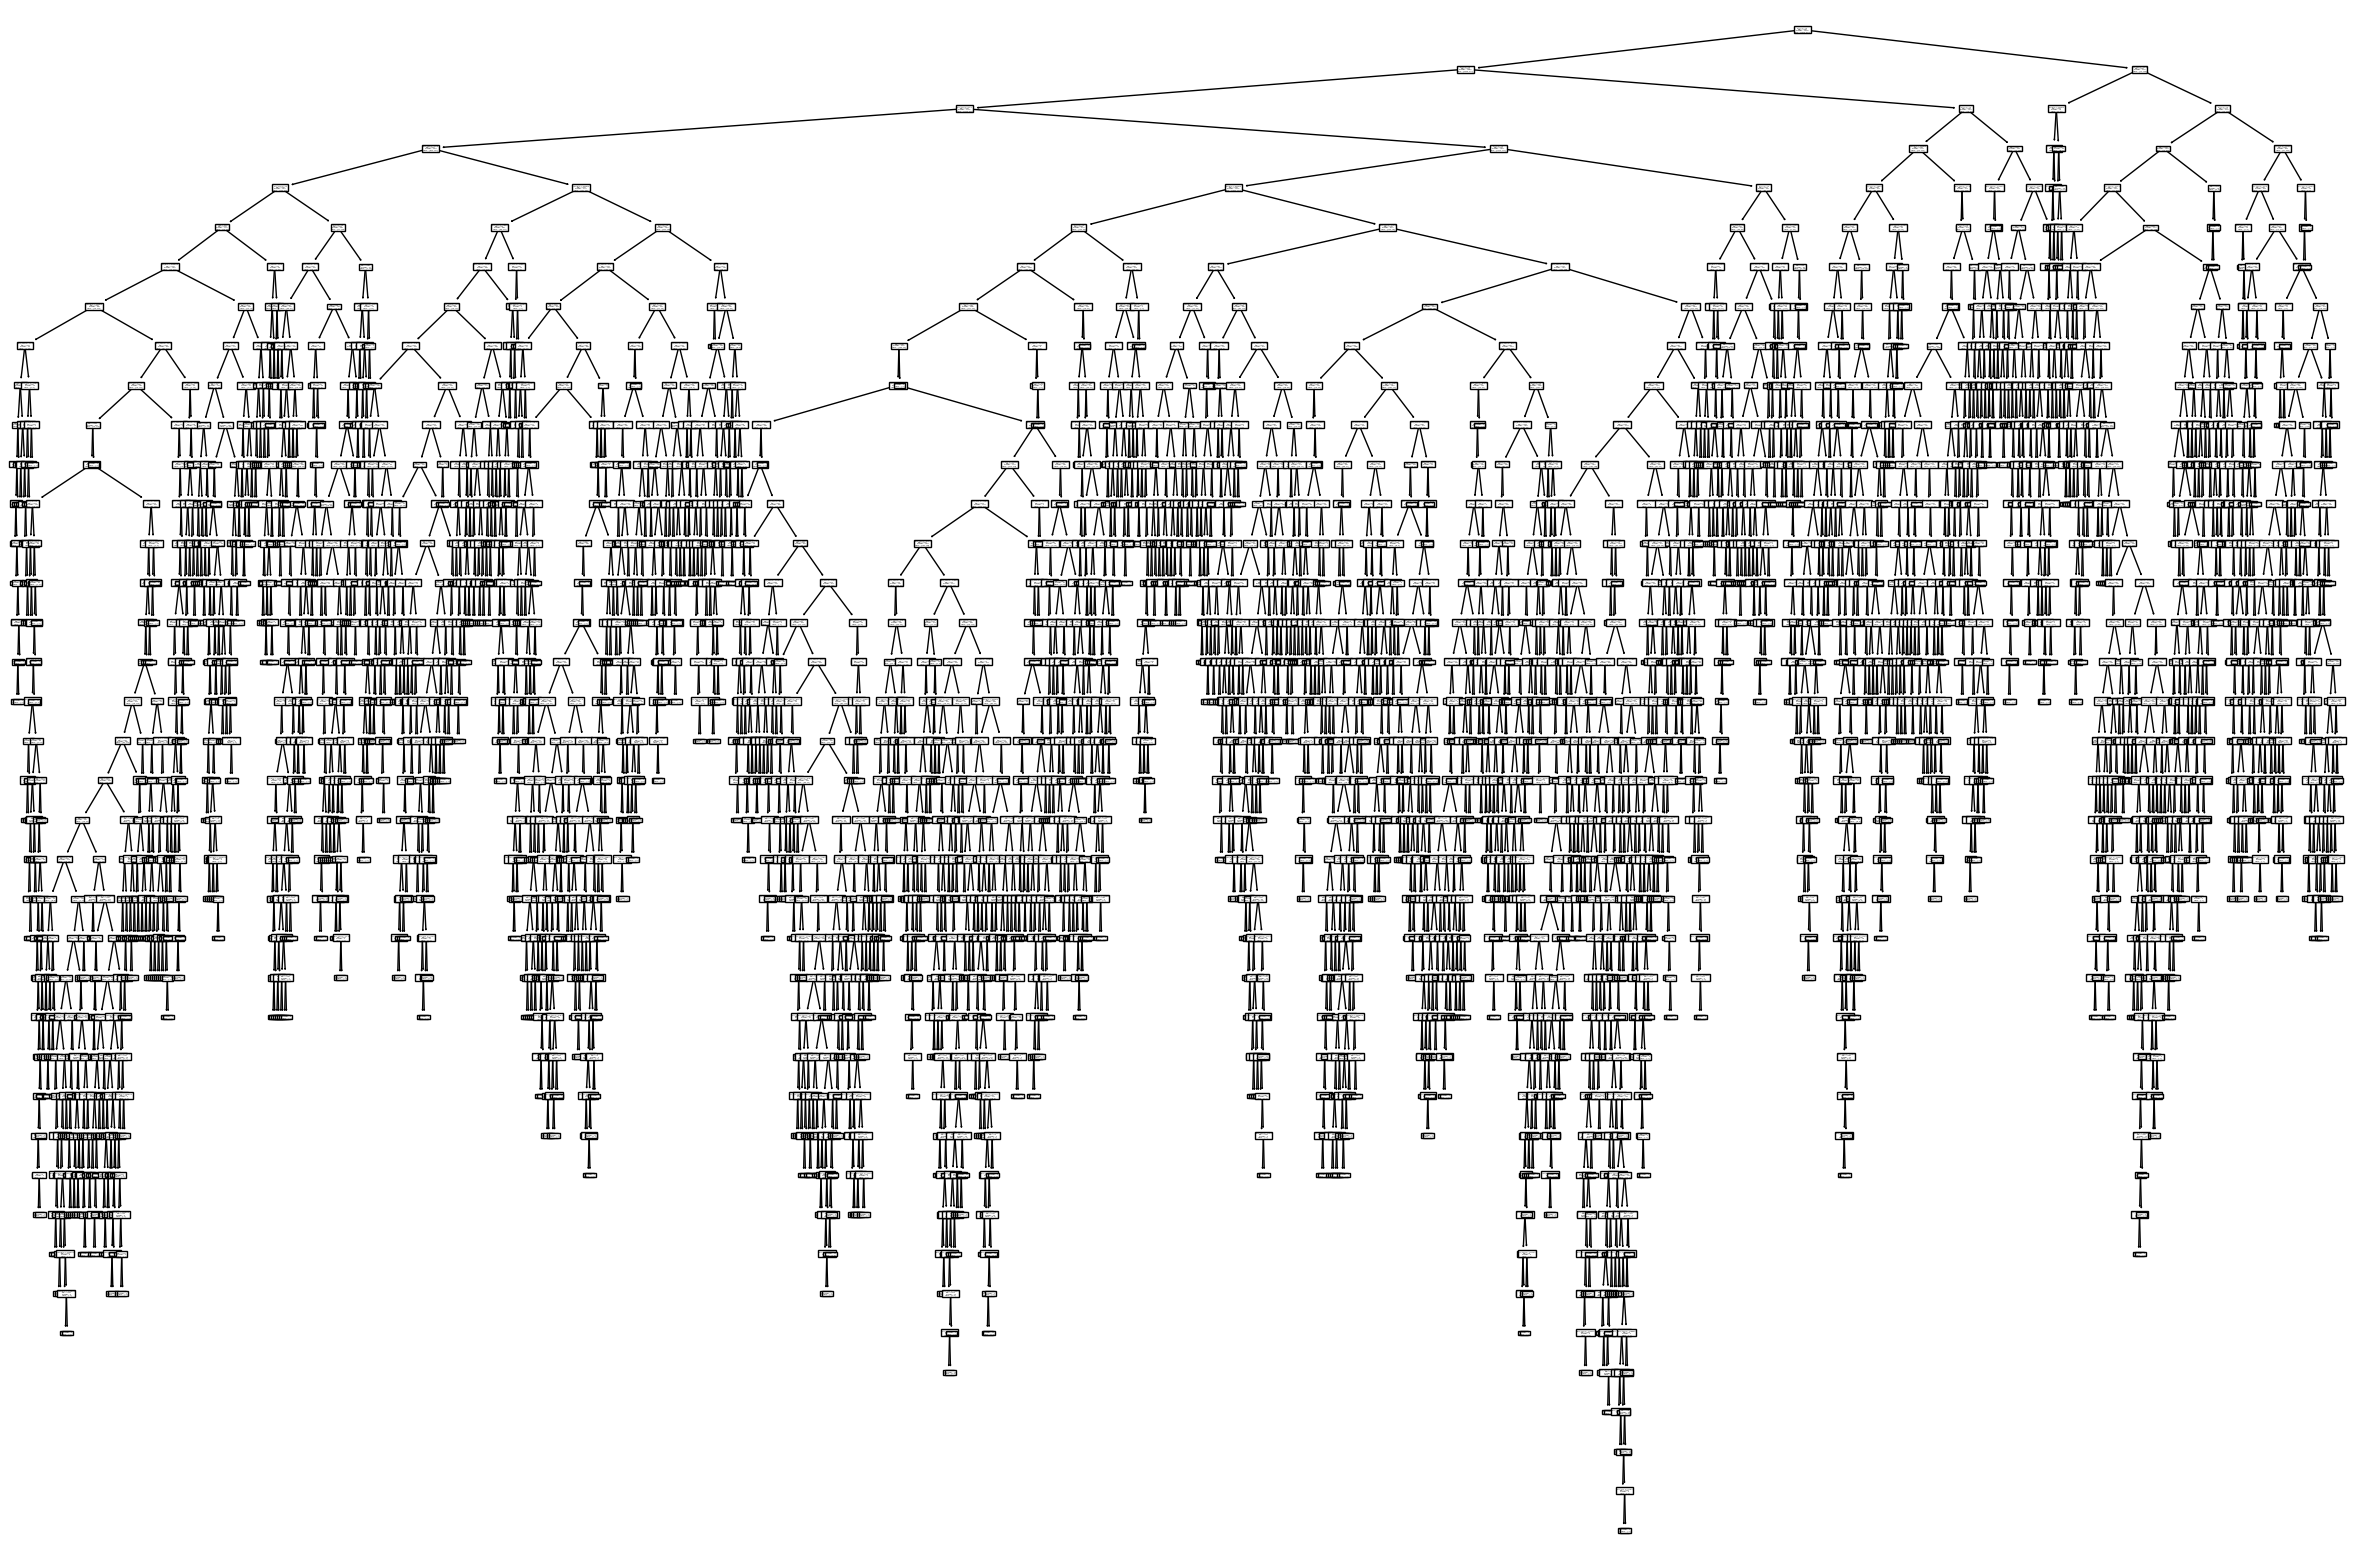

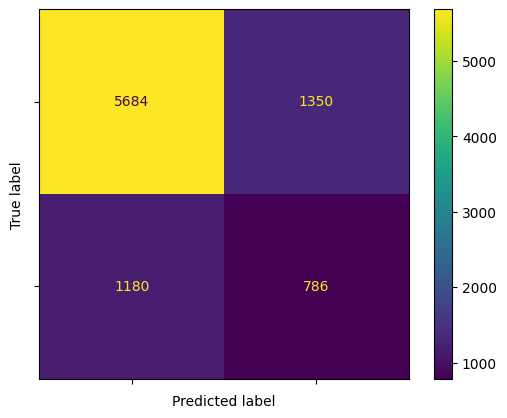

In [64]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier() #training
dtree.fit(X_train,y_train)


plt.figure(figsize=(30, 20))
tree.plot_tree(dtree, feature_names = features) #plotting the decision tree

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = dtree.predict(X_test)))


c1=classification_report(y_test, dtree.predict(X_test))
print(c1)


confusion_matrix = metrics.confusion_matrix(y_test, dtree.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()

# KNeighbors Classifier

In [51]:
import warnings
warnings.filterwarnings("ignore")

Train data accuracy: 0.8143632726926374
Test data accuracy: 0.7474444444444445
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      7034
           1       0.34      0.17      0.22      1966

    accuracy                           0.75      9000
   macro avg       0.57      0.54      0.54      9000
weighted avg       0.70      0.75      0.71      9000



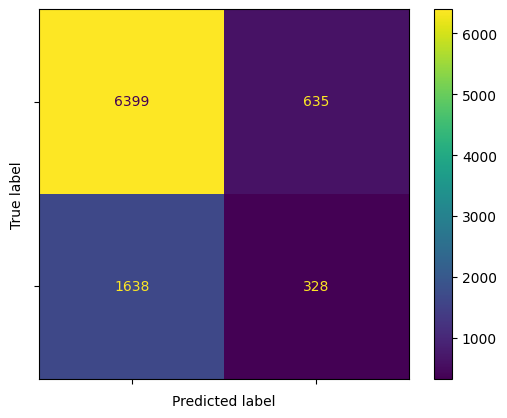

In [52]:
#KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = knn.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = knn.predict(X_test)))


c1=classification_report(y_test, knn.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, knn.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()



# Logistic Regression

Train data accuracy: 0.7775978664634727
Test data accuracy: 0.7814444444444445
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7034
           1       0.00      0.00      0.00      1966

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



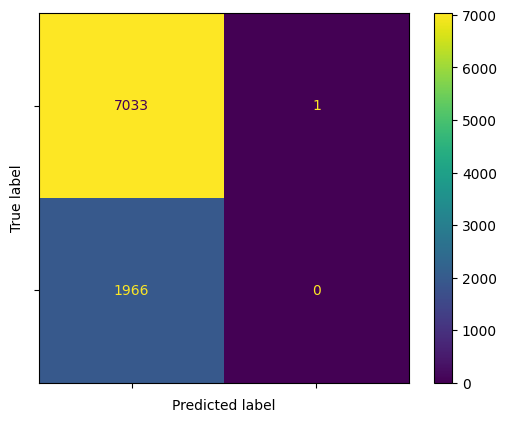

In [34]:
#Logistic Regression

from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = logr.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = logr.predict(X_test)))


c1=classification_report(y_test, logr.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, logr.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()

# Bagging Classifier

Train data accuracy: 0.9851890656252976
Test data accuracy: 0.8127777777777778
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7034
           1       0.63      0.35      0.45      1966

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



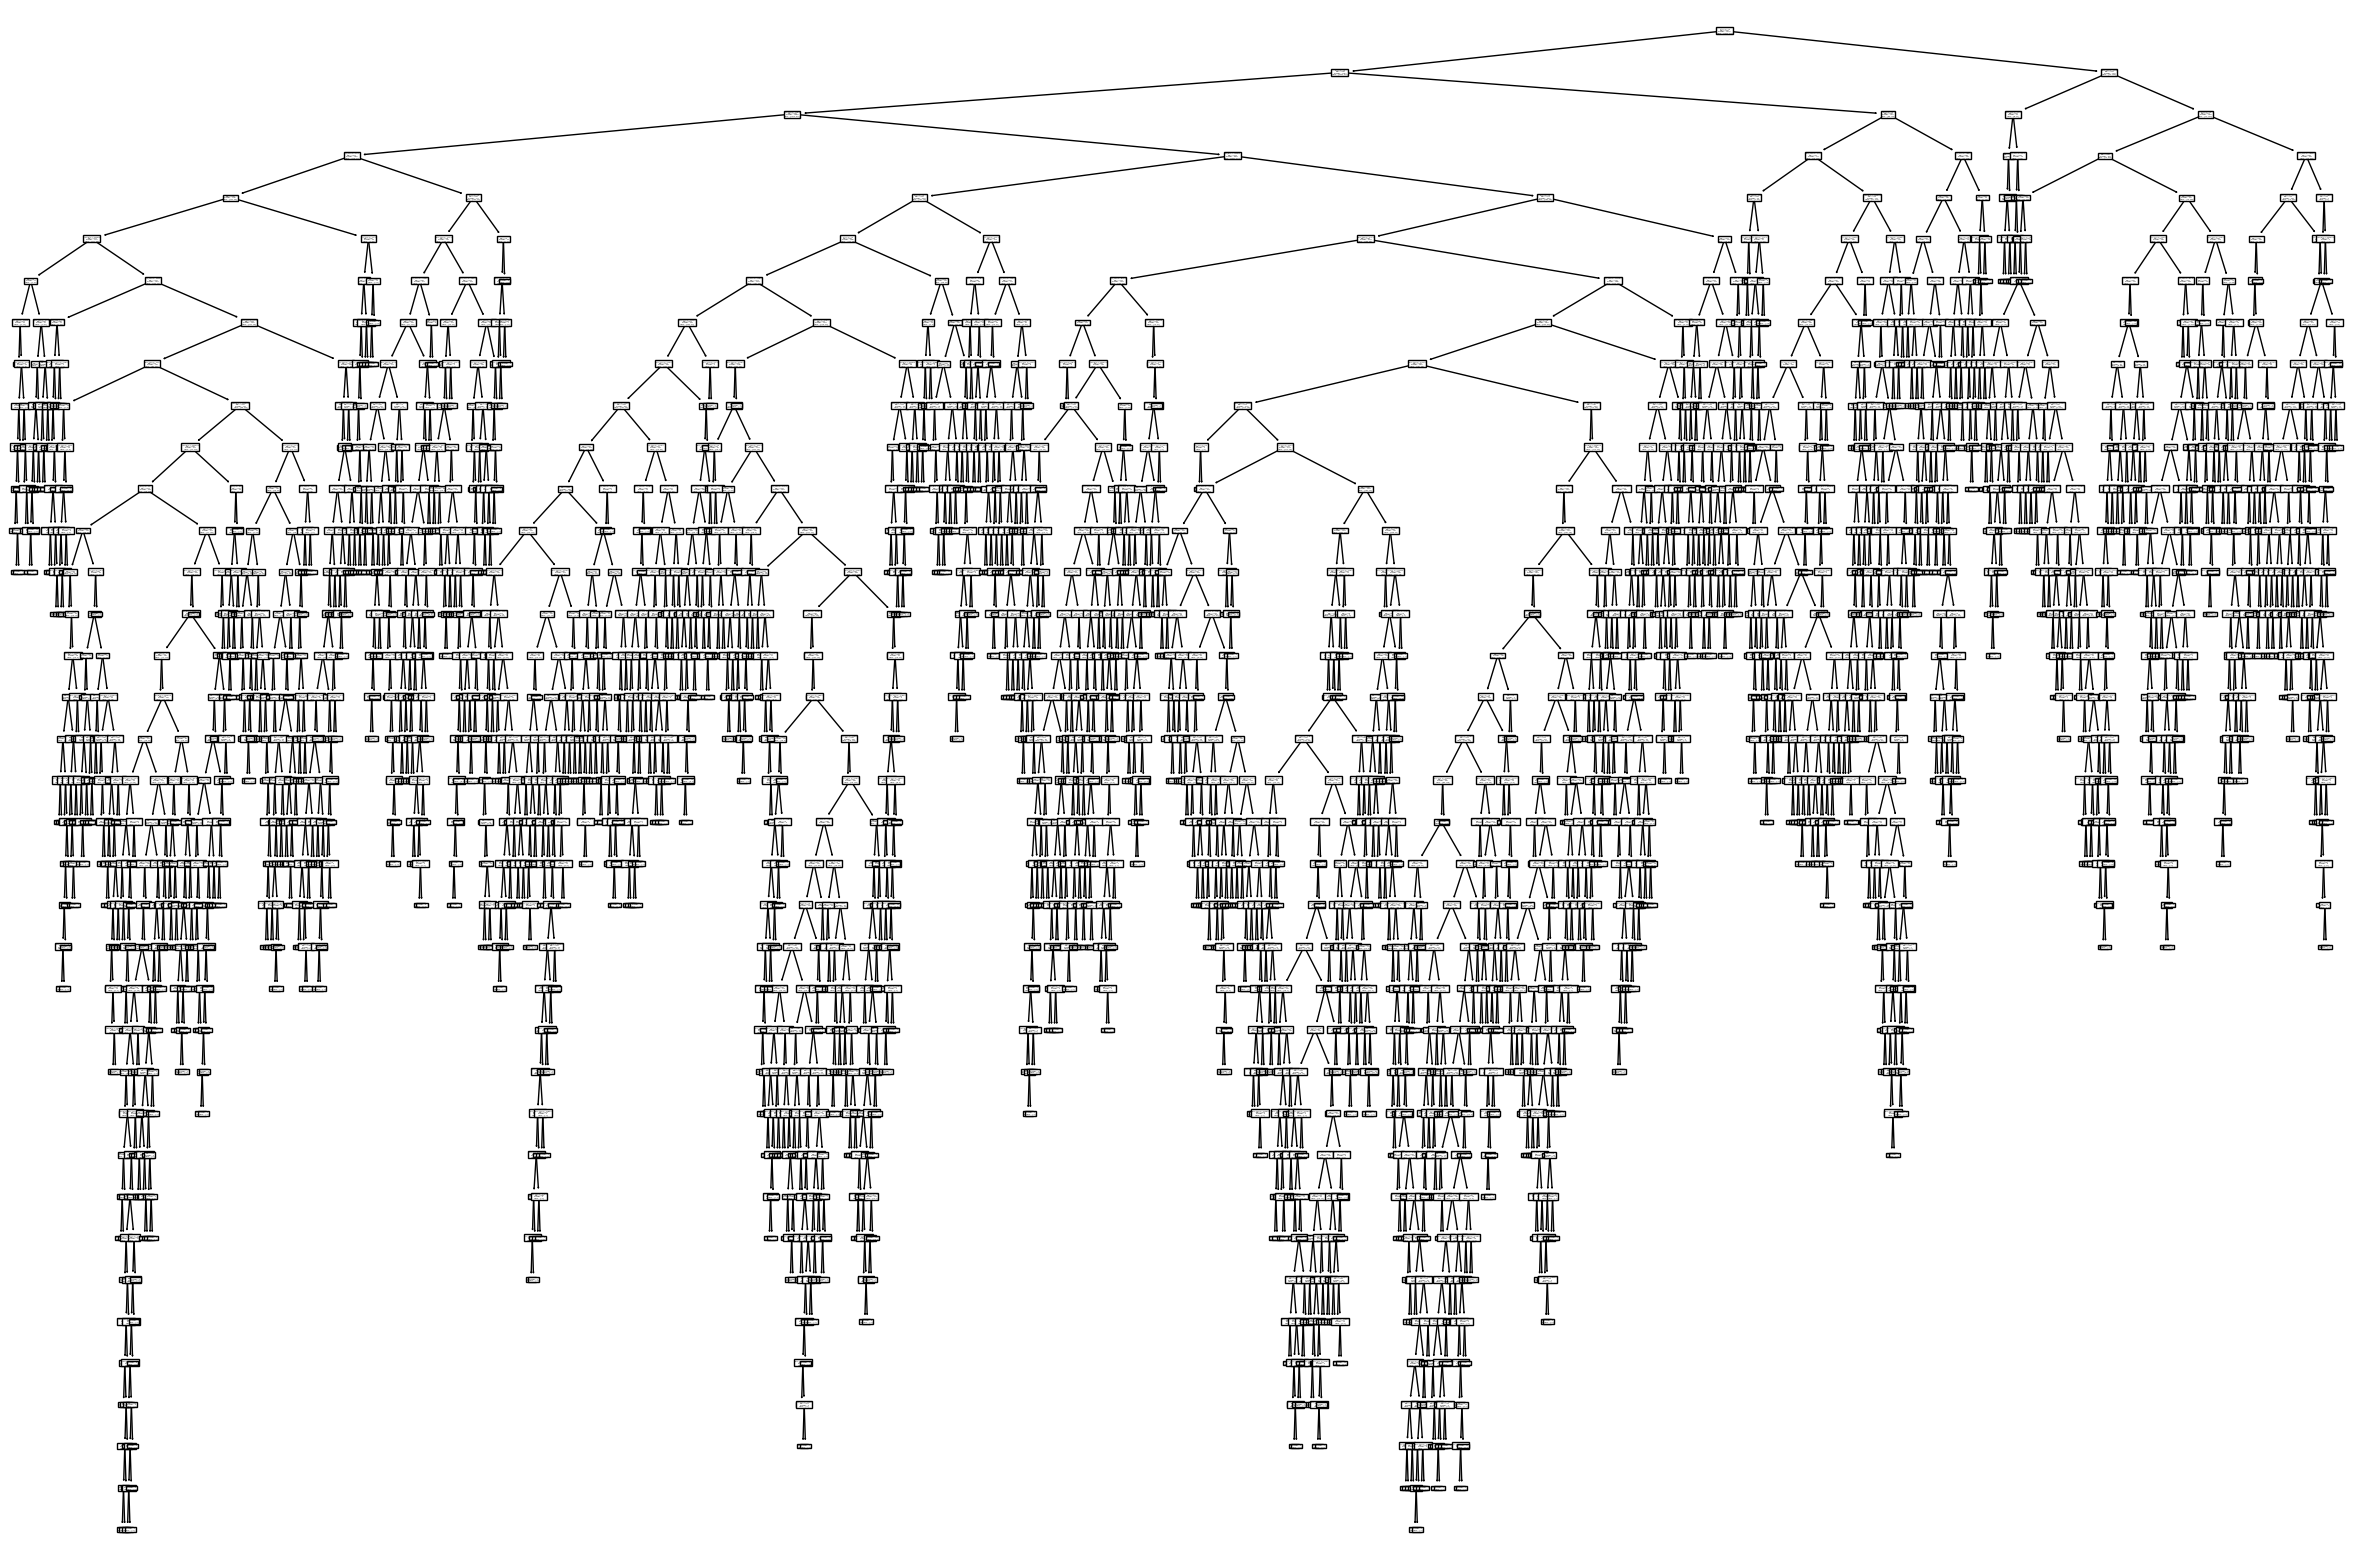

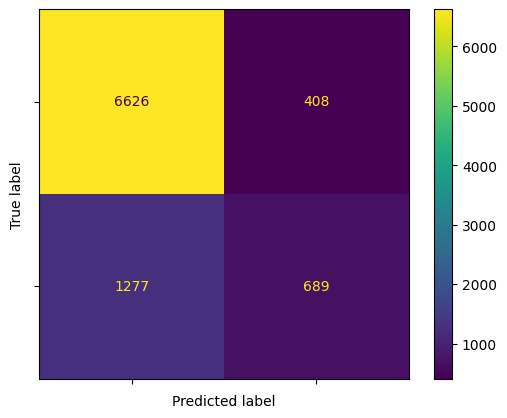

In [53]:
#Bagging Classifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

bagg = BaggingClassifier(n_estimators = 12)
bagg.fit(X_train, y_train)


plt.figure(figsize=(30, 20))
plot_tree(bagg.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bagg.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bagg.predict(X_test)))


c1=classification_report(y_test, bagg.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, bagg.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()

# AdaBoost Classifier

Train data accuracy: 0.816696828269359
Test data accuracy: 0.8175555555555556
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7034
           1       0.68      0.31      0.43      1966

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000



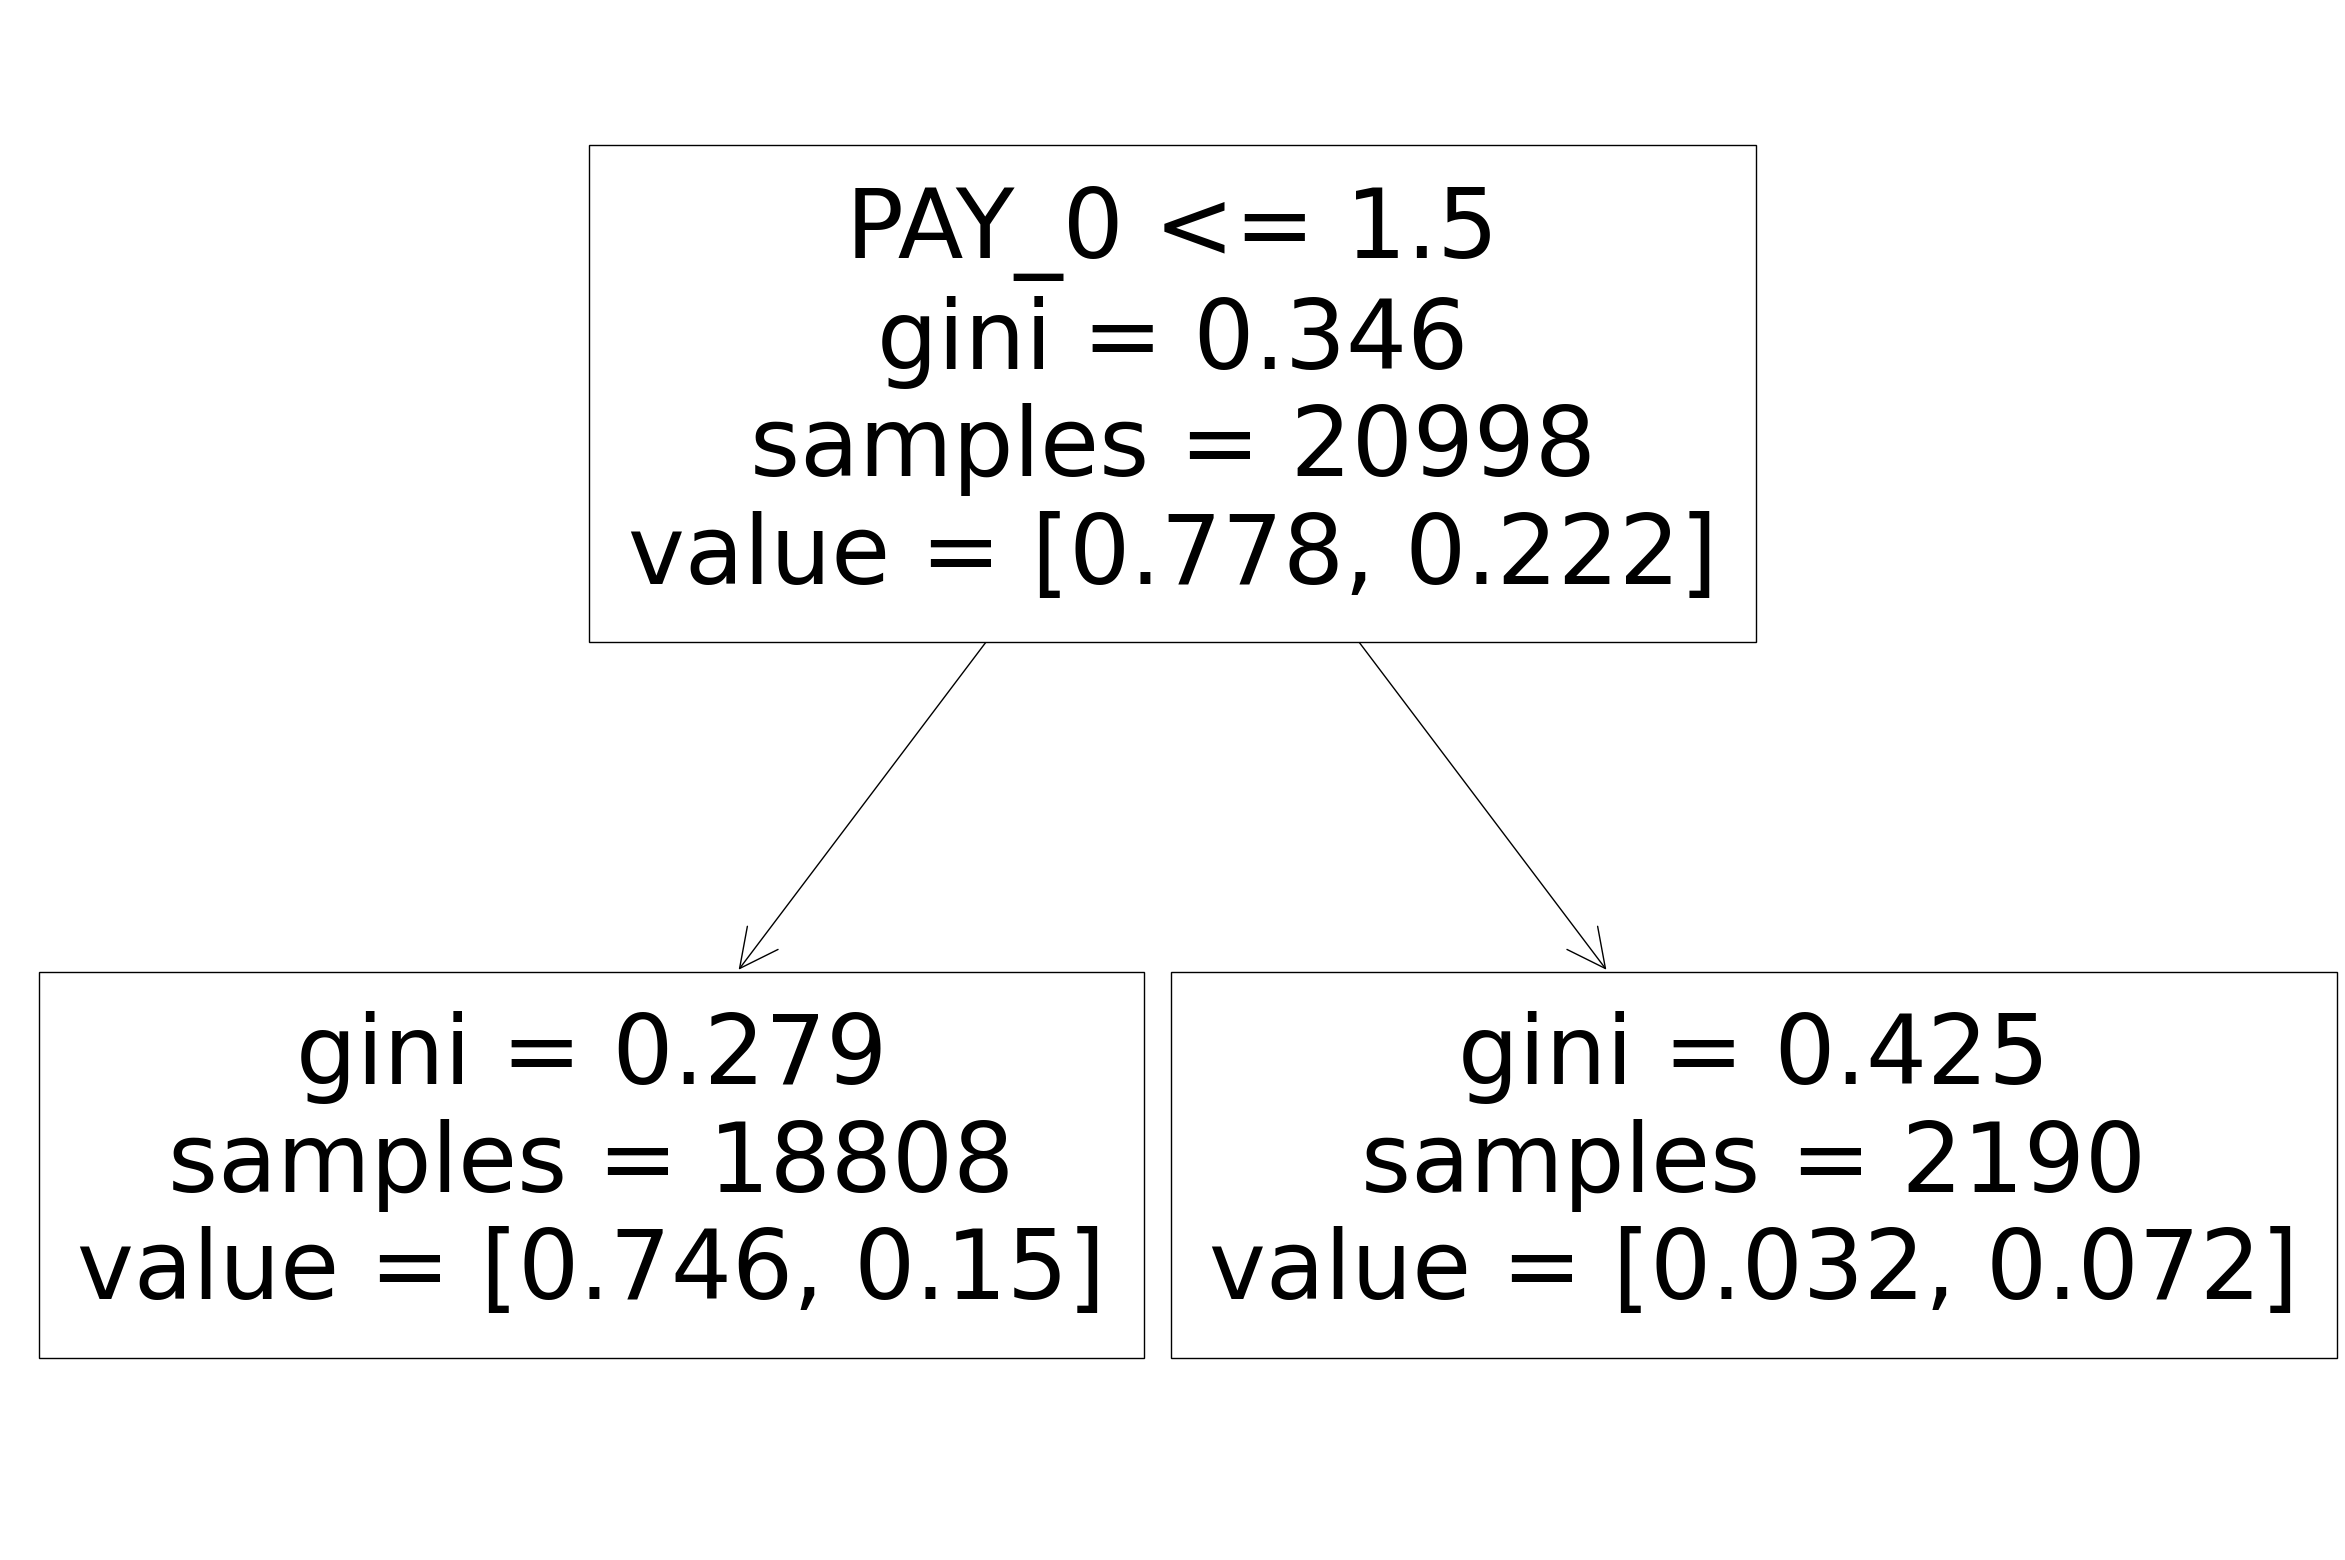

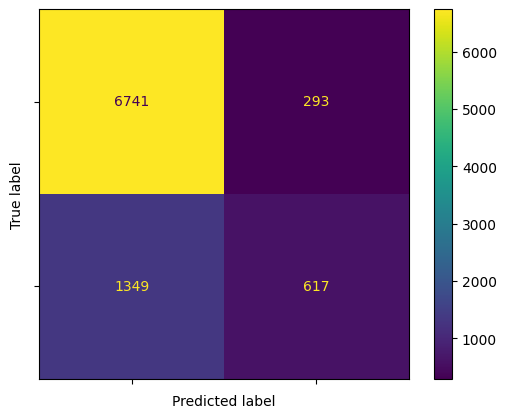

In [54]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train, y_train)

plt.figure(figsize=(30, 20))
plot_tree(ada.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = ada.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = ada.predict(X_test)))


c1=classification_report(y_test, ada.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, ada.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()


# Naive bayes classifier

Train data accuracy: 0.7696447280693399
Test data accuracy: 0.7698888888888888
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7034
           1       0.47      0.49      0.48      1966

    accuracy                           0.77      9000
   macro avg       0.67      0.67      0.67      9000
weighted avg       0.77      0.77      0.77      9000



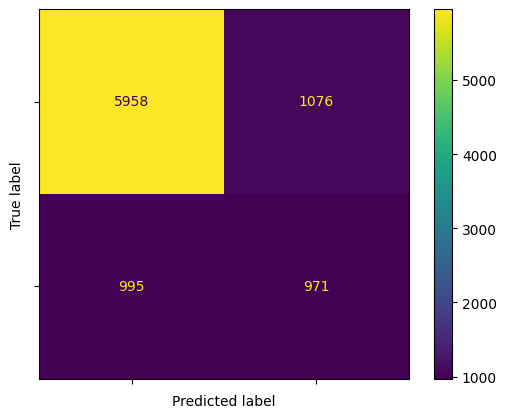

In [38]:
#Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bnb.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bnb.predict(X_test)))


c1=classification_report(y_test, bnb.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, bnb.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()


# Random Forest Classifier

Train data accuracy: 0.9709019906657776
Test data accuracy: 0.7881111111111111
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      7034
           1       0.52      0.37      0.43      1966

    accuracy                           0.79      9000
   macro avg       0.68      0.64      0.65      9000
weighted avg       0.77      0.79      0.77      9000



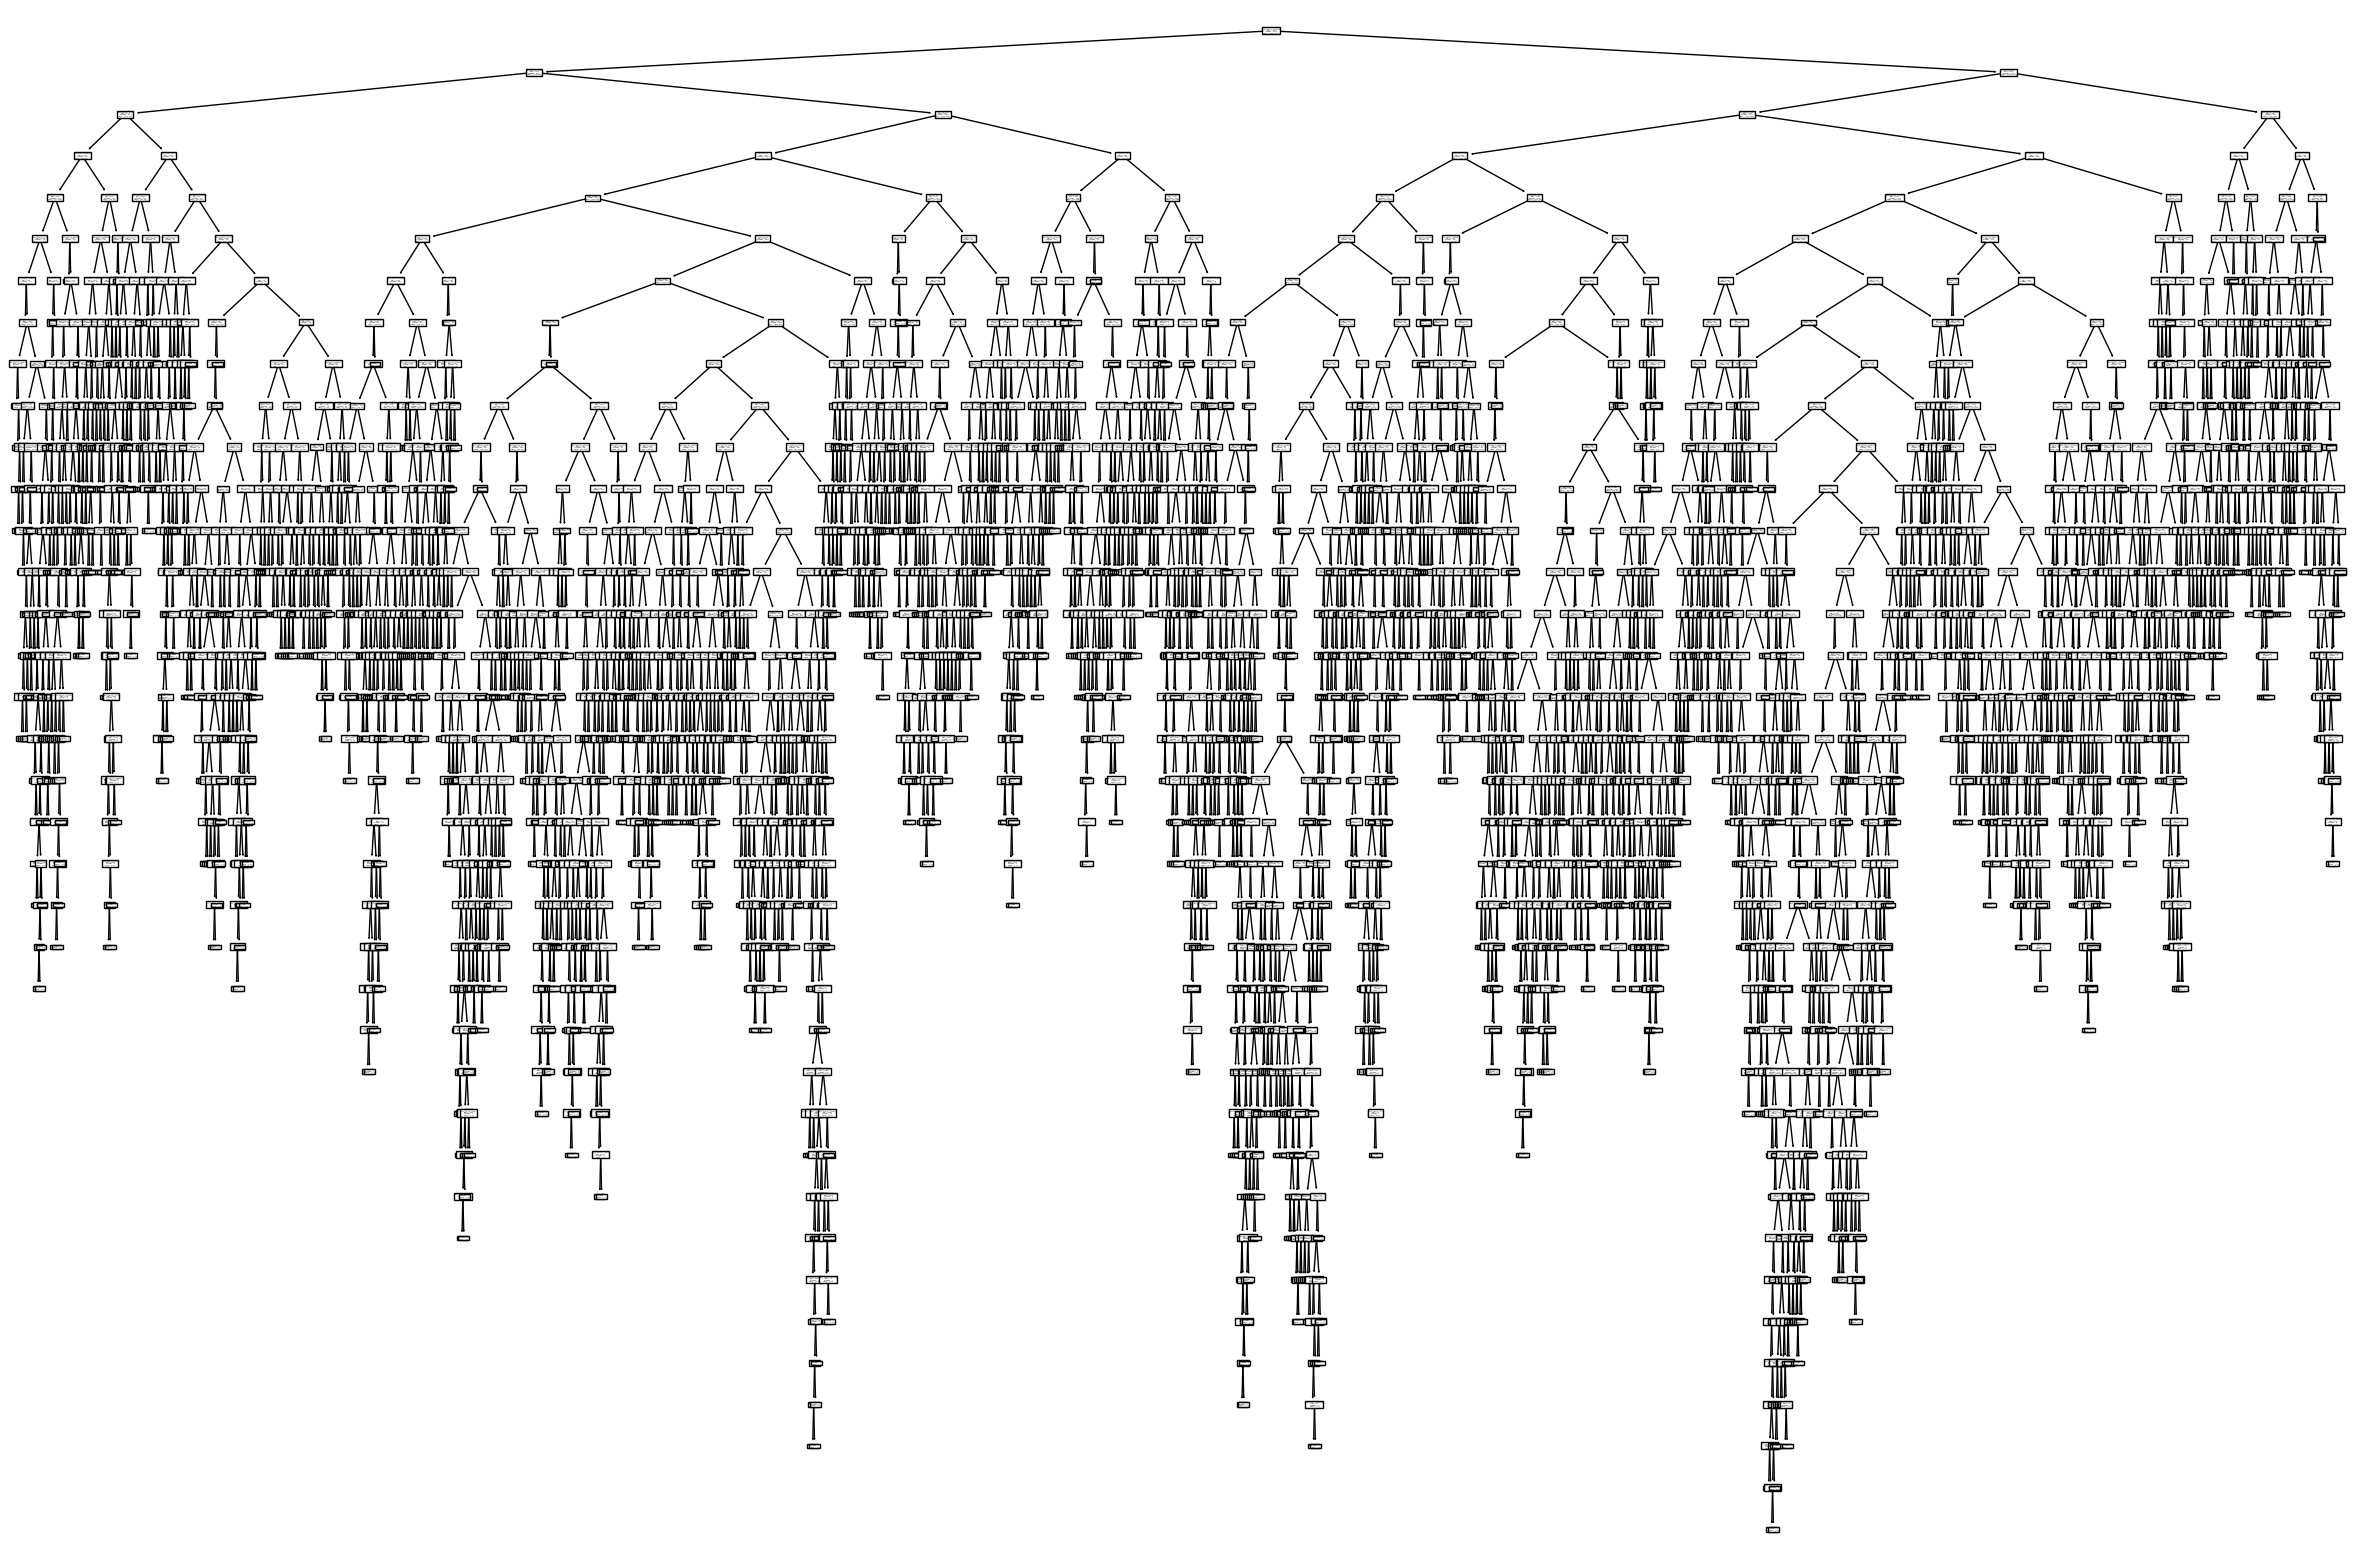

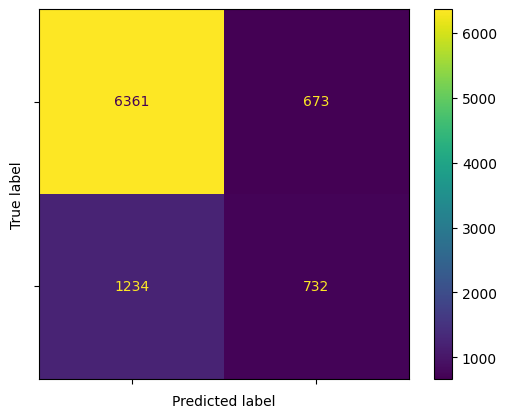

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train,y_train)

plt.figure(figsize=(30, 20))
plot_tree(rf.estimators_[0],feature_names = features )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = rf.predict(X_test)))


c1=classification_report(y_test, rf.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test,rf.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()


# Support Vector Machine

Train data accuracy: 0.9999047528336032
Test data accuracy: 0.7815555555555556
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7034
           1       0.00      0.00      0.00      1966

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



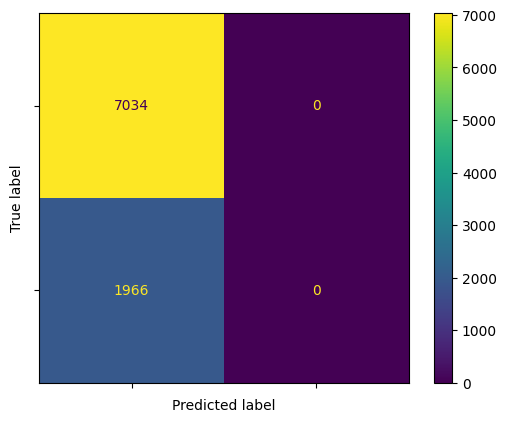

In [55]:
#SVM

from sklearn.svm import SVC
sv=SVC(gamma='auto')
sv.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = sv.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = sv.predict(X_test)))


c1=classification_report(y_test, sv.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, sv.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()

Train data accuracy: 0.7747404514715687
Test data accuracy: 0.7822222222222223
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      7034
           1       0.51      0.07      0.12      1966

    accuracy                           0.78      9000
   macro avg       0.65      0.53      0.50      9000
weighted avg       0.73      0.78      0.71      9000



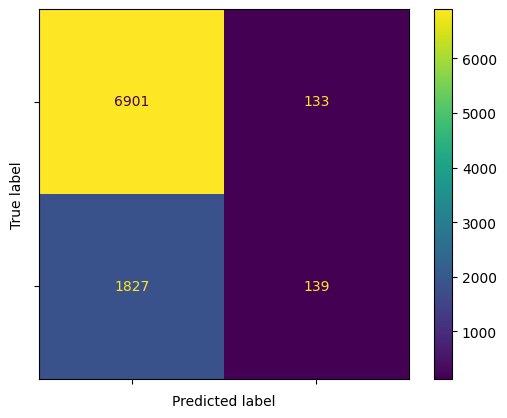

In [56]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000)
model.fit(X_train, y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = model.predict(X_test)))


c1=classification_report(y_test, model.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test,model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()

In [63]:
pip install xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Train data accuracy: 0.8303647966472998
Test data accuracy: 0.8207777777777778
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7034
           1       0.66      0.38      0.48      1966

    acc

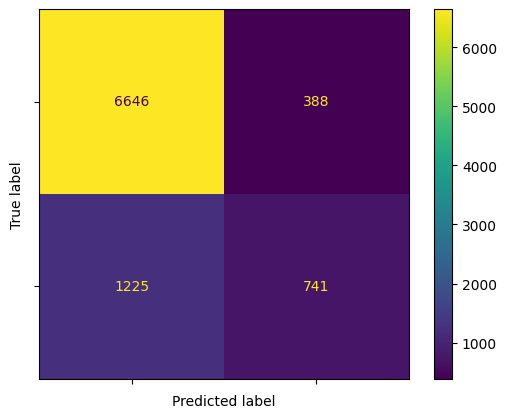

In [59]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=2)
model.fit(X_train, y_train)
print(model)


print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = model.predict(X_test)))


c1=classification_report(y_test, model.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test,model.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()



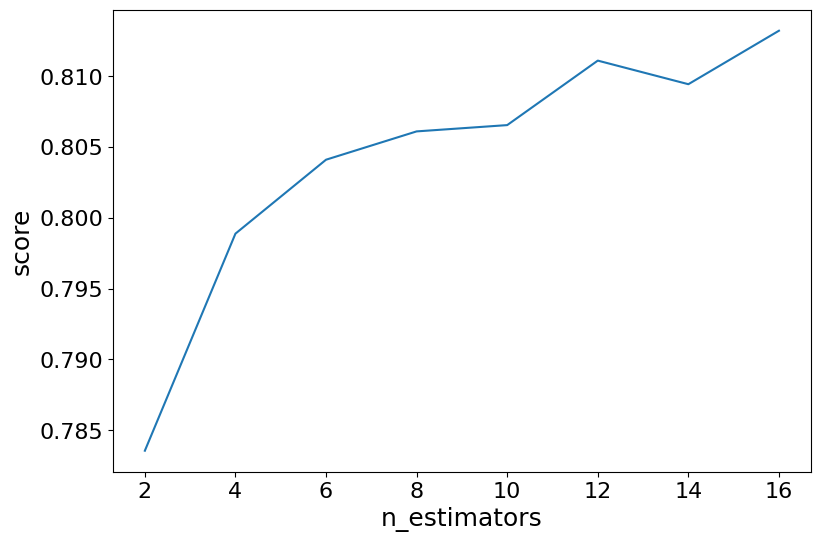

Train data accuracy: 0.9854748071244881
Test data accuracy: 0.8091111111111111
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7034
           1       0.61      0.34      0.44      1966

    accuracy                           0.81      9000
   macro avg       0.72      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



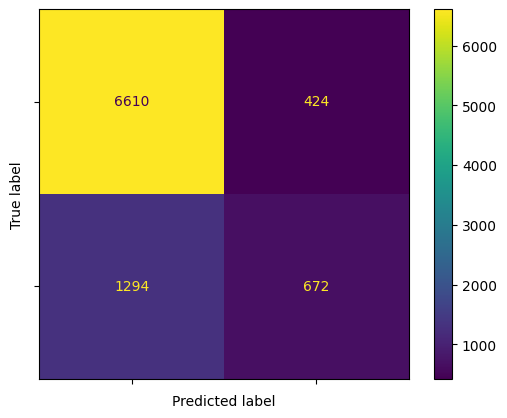

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()


#The curve shows that the highest accuracy achieves at n_estimators = 12


bagg = BaggingClassifier(n_estimators = 12)
bagg.fit(X_train, y_train)


print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = bagg.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = bagg.predict(X_test)))


c1=classification_report(y_test, bagg.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, bagg.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()

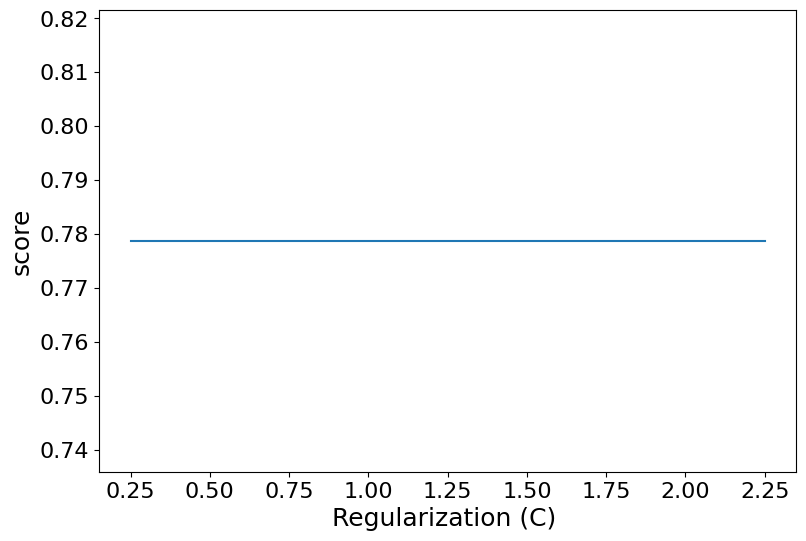

Train data accuracy: 0.7777407372130679
Test data accuracy: 0.7815555555555556
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7034
           1       0.00      0.00      0.00      1966

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



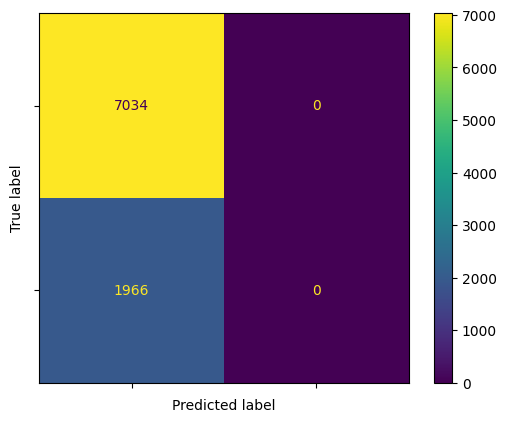

In [62]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25] #default value for C = 1

scores = []

for choice in C:
    logit.set_params(C=choice)
    logit.fit(x, y)
    scores.append(logit.score(x, y))

# Generate the plot of scores against C
plt.figure(figsize=(9,6))
plt.plot(C, scores)

# Adjust labels and font (to make visable)
plt.xlabel("Regularization (C) ", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()


#The curve shows that the highest accuracy achieves at C=2
logr = LogisticRegression(max_iter = 10000)
logr.set_params(C=2)
logr.fit(X_train,y_train)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = logr.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = logr.predict(X_test)))


c1=classification_report(y_test, logr.predict(X_test))
print(c1)

confusion_matrix = metrics.confusion_matrix(y_test, logr.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [])
cm_display.plot()
plt.show()
